In [1]:
# -*- coding: utf-8 -*-
# author: Yabin Zheng
# Email: sczhengyabin@hotmail.com

%matplotlib inline

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt

In [2]:
df = df_origin = pd.read_excel("./成都小区信息_20170323.xlsx", sheetname="成交记录")
df_i = pd.read_excel("./成都小区信息_20170323.xlsx", sheetname="小区信息")

## 时间段设置

In [3]:
df = df_origin[df_origin['季度'] >= '2013Q1']
# df = df_origin[df_origin['成交月份'] >= '2013.01']

## 行政区域成交情况

In [4]:
ss_district = df['区域'].value_counts()

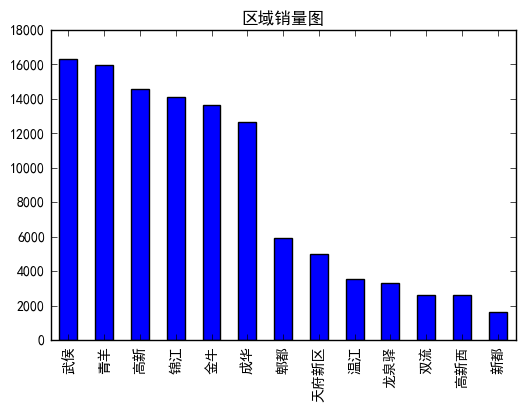

In [5]:
ss_district.plot(kind="bar", title="区域销量图")

## 成交量与房屋量比

In [6]:
ss_district_trade_house_ratio = ss_district.copy()
for district in ss_district.index:
    ss_district_trade_house_ratio.set_value(label=district,
                                            value=df_i[df_i['区域'] == district]['总户数'].sum())
ss_district_trade_house_ratio = (ss_district / ss_district_trade_house_ratio.values).sort_values(ascending=False)

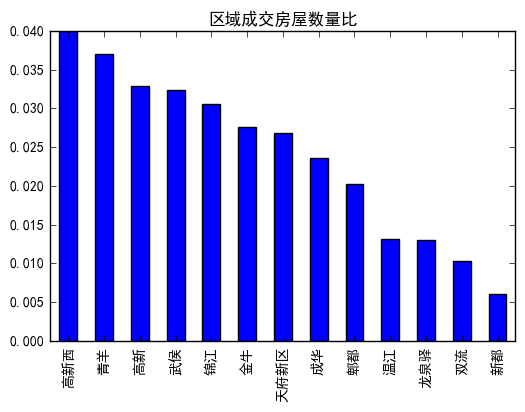

In [7]:
ss_district_trade_house_ratio.plot(kind='bar', title="区域成交房屋数量比")

## 季度成交统计

In [8]:
ss_season = df['季度'].value_counts().sort_index()

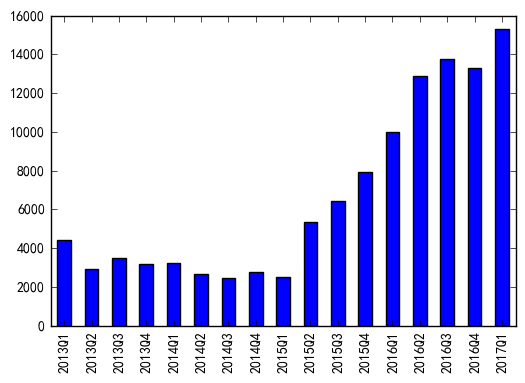

In [9]:
ss_season.plot(kind="bar")

## 月销量直方图

In [10]:
ss_month = df[df['成交月份'].astype(str) >= "2015.01"]['成交月份'].value_counts().sort_index()

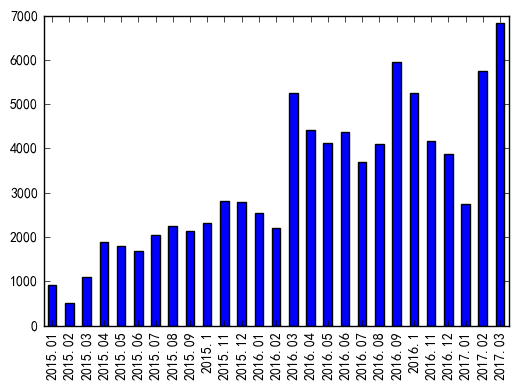

In [11]:
ss_month.plot(kind="bar")

## 销量同比增速

In [12]:
count_districts = len(ss_district)
count_seasons = len(ss_season)
df_district_season = pd.DataFrame(columns=ss_district.index.astype(str))

In [13]:
for season in ss_season.index:
    ss_district_season = df[df['季度'] == season]['区域'].value_counts().sort_index()
    ss_district_season.name = season
    df_district_season = df_district_season.append(ss_district_season)

In [14]:
df_district_season_acc = df_district_season.drop(["2013Q1", "2013Q2", "2013Q3", "2013Q4"], axis=0)
for i in range(0, len(df_district_season) - 4):
    df_district_season_acc.ix[i] = 100 * (df_district_season.ix[i+4] / df_district_season.ix[i] - 1)

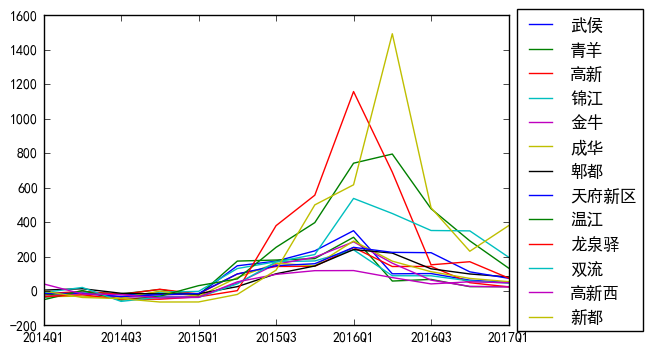

In [15]:
df_district_season_acc.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 热门小区

In [16]:
ss_xiaoqu = df['小区名称'].value_counts()[:20]

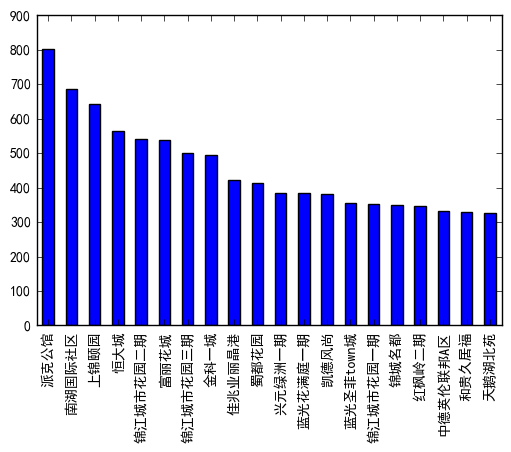

In [17]:
ss_xiaoqu.plot(kind="bar")

## 保存新的excel
**注意，只会生成一个sheet，因此先保存成不一样的文件，再手工拷贝过去**

In [18]:
writer = pd.ExcelWriter("./成都小区信息_new.xlsx")
df.to_excel(writer, "成交记录")
writer.save()